<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


'wget' is not recognized as an internal or external command,
operable program or batch file.


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



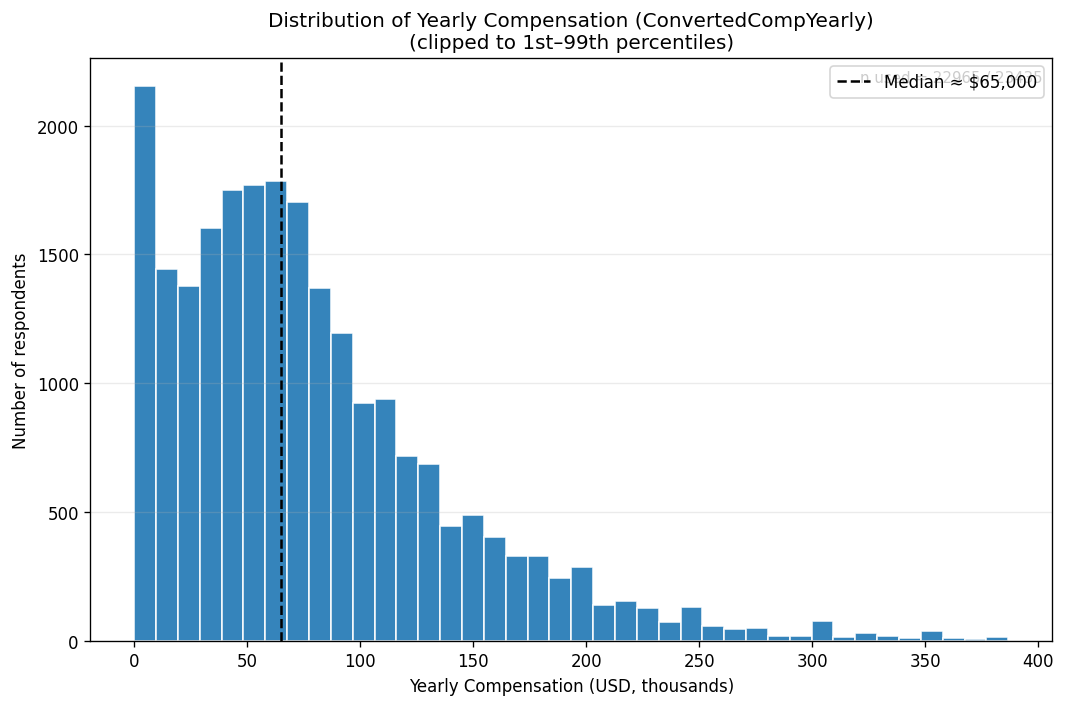

In [4]:
## Write your code here
# Lab 23 — Task 1.1
# Histogram of ConvertedCompYearly (using sqlite3 + Matplotlib)

import sqlite3, numpy as np, pandas as pd, matplotlib.pyplot as plt

# 1) Load the DataFrame into an in-memory SQLite DB
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, index=False, if_exists="replace")

# Helper: pick the right comp column if your dataset uses a variant name
def pick(cols):
    for c in cols:
        if c in df.columns: return c
    return None

comp_col = pick(["ConvertedCompYearly", "CompTotal", "CompTotalUSD", "Salary"])
if comp_col is None:
    raise ValueError("Could not find a yearly compensation column in the dataset.")

# 2) SQL → pull compensation as REAL
query = f"""
SELECT CAST({comp_col} AS REAL) AS comp
FROM survey
WHERE {comp_col} IS NOT NULL
"""
comp = pd.read_sql_query(query, conn)["comp"].astype(float)
conn.close()

# 3) Clean & clip extreme outliers for a readable histogram
comp = comp[comp > 0]                           # remove non-positive
q1, q99 = comp.quantile([0.01, 0.99])           # 1st–99th pct clip (change if you prefer)
comp_clip = comp[(comp >= q1) & (comp <= q99)]

# 4) Plot
fig, ax = plt.subplots(figsize=(9, 6), dpi=120)
ax.hist(comp_clip/1000, bins=40, alpha=0.9, edgecolor="white")

# Median line (use unclipped median for reference)
med = np.median(comp)
ax.axvline(med/1000, color="black", linewidth=1.5, linestyle="--", label=f"Median ≈ ${med:,.0f}")

ax.set_xlabel("Yearly Compensation (USD, thousands)")
ax.set_ylabel("Number of respondents")
ax.set_title("Distribution of Yearly Compensation (ConvertedCompYearly)\n(clipped to 1st–99th percentiles)")
ax.grid(True, axis="y", alpha=0.25)
ax.legend(frameon=True)

# Optional: show how many points were used
n_used = len(comp_clip)
n_total = len(comp[comp>0])
ax.text(0.99, 0.98, f"n used = {n_used} / {n_total}", transform=ax.transAxes,
        ha="right", va="top", fontsize=9,
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))

plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



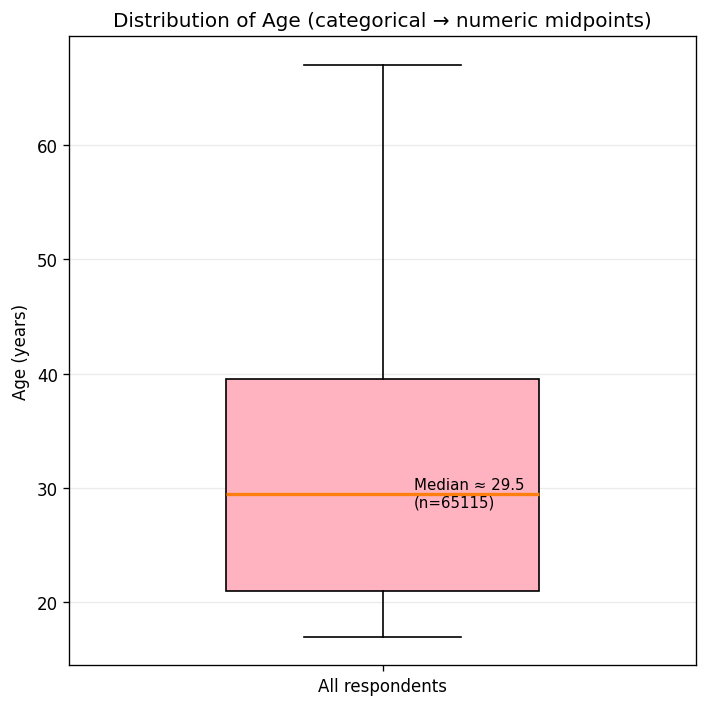

In [5]:
## Write your code here
# Lab 23 — Task 1.2
# Box plot of Age (categorical → numeric via midpoints), using sqlite3 + Matplotlib

import sqlite3, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Load your DataFrame into SQLite (in-memory) ---
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, index=False, if_exists="replace")

# --- 2) SQL: read the raw Age column ---
if "Age" not in df.columns:
    raise ValueError("Could not find 'Age' column in the dataset.")
ages_raw = pd.read_sql_query("SELECT Age FROM survey WHERE Age IS NOT NULL", conn)["Age"]
conn.close()

# --- 3) Convert categorical Age to numeric (years) ---
def age_to_numeric(val):
    if pd.isna(val): 
        return np.nan
    s = str(val).strip()

    # Common textual buckets
    if re.search(r'under\s*18', s, re.I):
        return 17.0                     # midpoint proxy for "Under 18"
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I):
        return 67.0                     # small offset above 65

    # Ranges like "25-34" or "25–34 years old"
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return (a + b) / 2.0

    # Fallback: first number present (e.g., "30 years old")
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    return float(m2.group(1)) if m2 else np.nan

age_num = ages_raw.map(age_to_numeric).astype(float)

# Optional: keep only realistic human ages
age_num = age_num[(age_num >= 10) & (age_num <= 90)].dropna()

# --- 4) Plot: box plot of numeric ages ---
fig, ax = plt.subplots(figsize=(6, 6), dpi=120)

# A single box; patch_artist for a filled box
bp = ax.boxplot(
    [age_num.values],
    vert=True, patch_artist=True, widths=0.5,
    medianprops=dict(linewidth=2),
    boxprops=dict(linewidth=1),
    whiskerprops=dict(linewidth=1),
    capprops=dict(linewidth=1),
    flierprops=dict(marker='o', markersize=3, alpha=0.35)
)

# Light fill color for the box
for b in bp['boxes']:
    b.set_facecolor('#ffb3c1')  # soft pink; feel free to change

ax.set_ylabel("Age (years)")
ax.set_xticks([1])
ax.set_xticklabels(["All respondents"])
ax.set_title("Distribution of Age (categorical → numeric midpoints)")
ax.grid(True, axis='y', alpha=0.25)

# Annotate n and median
n = len(age_num)
med = np.median(age_num)
ax.text(1.05, med, f"Median ≈ {med:.1f}\n(n={n})", va="center", fontsize=9)

plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



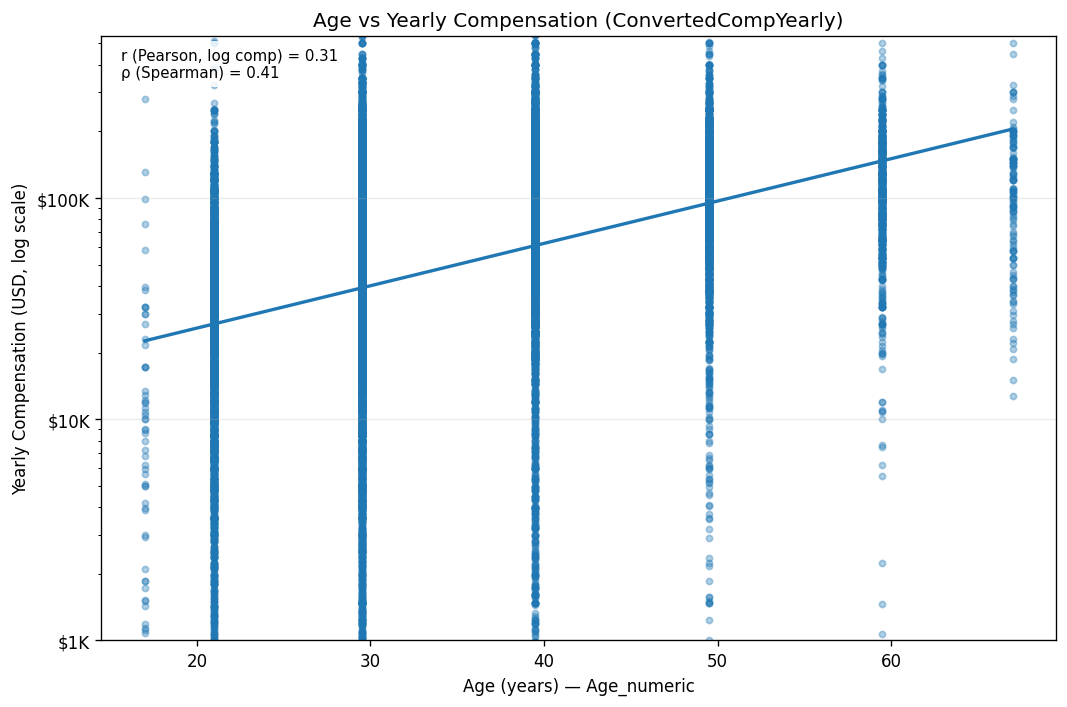

In [6]:
## Write your code here
# Lab 23 — Task 2.1
# Scatter of Age_numeric vs ConvertedCompYearly (SQL + Matplotlib)

import sqlite3, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- helper: convert Age band → numeric midpoint (years) ---
def age_to_numeric(val):
    if pd.isna(val): 
        return np.nan
    s = str(val).strip()
    if re.search(r'under\s*18', s, re.I): 
        return 17.0
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): 
        return 67.0
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)    # e.g., "25-34 years old"
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return (a + b) / 2.0
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    return float(m2.group(1)) if m2 else np.nan

def human_currency(v, _):
    if v >= 1e9: return f"${v/1e9:.1f}B"
    if v >= 1e6: return f"${v/1e6:.1f}M"
    if v >= 1e3: return f"${v/1e3:.0f}K"
    return f"${v:.0f}"

# --- 1) Push to SQLite & query needed columns ---
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, index=False, if_exists="replace")
sql = """
  SELECT Age, ConvertedCompYearly
  FROM survey
  WHERE ConvertedCompYearly IS NOT NULL
"""
raw = pd.read_sql_query(sql, conn)
conn.close()

# --- 2) Build Age_numeric & clean ---
raw["Age_numeric"] = raw["Age"].map(age_to_numeric)
raw["Comp"] = pd.to_numeric(raw["ConvertedCompYearly"], errors="coerce")

plot_df = (raw[["Age_numeric", "Comp"]]
           .dropna()
           .query("Comp > 0"))

if plot_df.empty:
    print("⚠️ No valid rows after cleaning (check Age and compensation columns).")
else:
    x = plot_df["Age_numeric"].to_numpy()
    y = plot_df["Comp"].to_numpy()

    # Fit a regression to log10(comp) (compensation is very skewed)
    beta1, beta0 = np.polyfit(x, np.log10(y), 1)     # log10(y) ~ beta0 + beta1*x
    xline = np.linspace(x.min(), x.max(), 200)
    yline = 10 ** (beta0 + beta1 * xline)

    # Correlations (on log comp for robustness)
    r_pearson = np.corrcoef(x, np.log10(y))[0, 1]
    r_spear   = pd.Series(x).corr(pd.Series(np.log10(y)), method="spearman")

    # --- 3) Plot ---
    fig, ax = plt.subplots(figsize=(9, 6), dpi=120)
    ax.scatter(x, y, s=14, alpha=0.35)
    ax.plot(xline, yline, linewidth=2)

    # Log scale for compensation
    ax.set_yscale("log")
    ax.yaxis.set_major_formatter(FuncFormatter(human_currency))

    # Keep extreme outliers from dominating the view
    y_max = np.nanpercentile(y, 99.5)
    ax.set_ylim(1e3, y_max)

    ax.set_xlabel("Age (years) — Age_numeric")
    ax.set_ylabel("Yearly Compensation (USD, log scale)")
    ax.set_title("Age vs Yearly Compensation (ConvertedCompYearly)")
    ax.grid(True, axis="y", alpha=0.25)

    ax.text(0.02, 0.98, f"r (Pearson, log comp) = {r_pearson:.2f}\n"
                        f"ρ (Spearman) = {r_spear:.2f}",
            transform=ax.transAxes, ha="left", va="top",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.85), fontsize=9)

    plt.tight_layout()
    plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


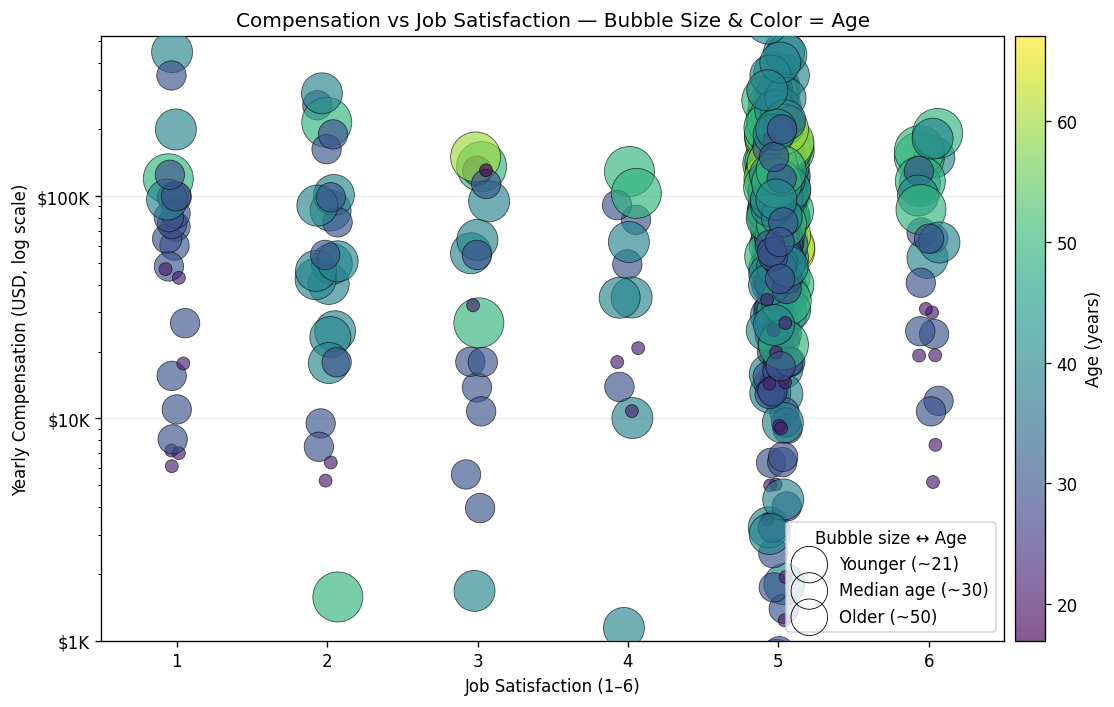

In [7]:
## Write your code here
# %%
# Lab 23 — Task 2.2
# Bubble Plot: ConvertedCompYearly (y) vs JobSatPoints_6 (x), bubble size = Age_numeric
# SQL (sqlite3) to extract, then Matplotlib to visualize.

import sqlite3, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- helpers ---
def age_to_numeric(val):
    """Convert categorical Age (e.g., '25-34 years old', '65+') to a numeric midpoint."""
    if pd.isna(val): 
        return np.nan
    s = str(val).strip()
    if re.search(r'under\s*18', s, re.I): return 17.0
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): return 67.0
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)  # e.g., "25-34"
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return (a + b) / 2.0
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    return float(m2.group(1)) if m2 else np.nan

def scale_sizes(values, smin=60, smax=900):
    """Map Age values to bubble sizes using 10th–90th percentiles (robust to outliers)."""
    v = np.asarray(values, float)
    lo, hi = np.nanpercentile(v, [10, 90])
    if not np.isfinite(lo) or not np.isfinite(hi) or hi <= lo:
        return np.full_like(v, (smin + smax) / 2.0)
    t = np.clip((v - lo) / (hi - lo), 0, 1)
    return smin + t * (smax - smin)

def money_fmt(v, _):
    if v >= 1e9: return f"${v/1e9:.1f}B"
    if v >= 1e6: return f"${v/1e6:.1f}M"
    if v >= 1e3: return f"${v/1e3:.0f}K"
    return f"${v:.0f}"

# --- 1) Query needed columns from SQLite ---
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, index=False, if_exists="replace")

# If your dataset uses variant names, adjust the SELECT here.
sql = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM survey
WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
raw = pd.read_sql_query(sql, conn)
conn.close()

# --- 2) Build Age_numeric & clean ---
raw["Age_numeric"] = raw["Age"].map(age_to_numeric)
raw["Comp"] = pd.to_numeric(raw["ConvertedCompYearly"], errors="coerce")
raw["Sat6"] = pd.to_numeric(raw["JobSatPoints_6"], errors="coerce")

plot_df = (raw[["Age_numeric", "Comp", "Sat6"]]
           .dropna()
           .query("Comp > 0 and 1 <= Sat6 and Sat6 <= 6"))

if plot_df.empty:
    print("⚠️ No valid rows after cleaning (check Age, compensation > 0, and JobSatPoints_6).")
else:
    # Slight jitter on x so discrete Sat values don't stack perfectly
    rng = np.random.default_rng(42)
    x = plot_df["Sat6"].to_numpy()
    x_jit = x + rng.uniform(-0.08, 0.08, size=len(x))
    y = plot_df["Comp"].to_numpy()
    ages = plot_df["Age_numeric"].to_numpy()
    sizes = scale_sizes(ages)

    # --- 3) Plot ---
    fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
    sc = ax.scatter(
        x_jit, y,
        s=sizes, alpha=0.65,
        c=ages, cmap="viridis",
        edgecolors="black", linewidths=0.5, zorder=3
    )

    # Compensation is skewed → log scale helps
    ax.set_yscale("log")
    ax.yaxis.set_major_formatter(FuncFormatter(money_fmt))

    # Keep y-limits readable (clip top at ~99.5th percentile)
    y_top = np.nanpercentile(y, 99.5)
    ax.set_ylim(max(1e3, y.min()*0.8), y_top)

    ax.set_xlabel("Job Satisfaction (1–6)")
    ax.set_xticks([1, 2, 3, 4, 5, 6])
    ax.set_xlim(0.5, 6.5)
    ax.set_ylabel("Yearly Compensation (USD, log scale)")
    ax.set_title("Compensation vs Job Satisfaction — Bubble Size & Color = Age")
    ax.grid(True, axis="y", alpha=0.25)

    # Colorbar for age
    cbar = plt.colorbar(sc, ax=ax, pad=0.01)
    cbar.set_label("Age (years)")

    # Bubble-size legend (use age quantiles)
    q10, q50, q90 = np.nanpercentile(ages, [10, 50, 90])
    for val, lab in zip([q10, q50, q90], ["Younger", "Median age", "Older"]):
        ax.scatter([], [], s=scale_sizes([val])[0], c="none",
                   edgecolors="black", linewidths=0.5, label=f"{lab} (~{val:.0f})")
    ax.legend(title="Bubble size ↔ Age", frameon=True, loc="lower right")

    plt.tight_layout()
    plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



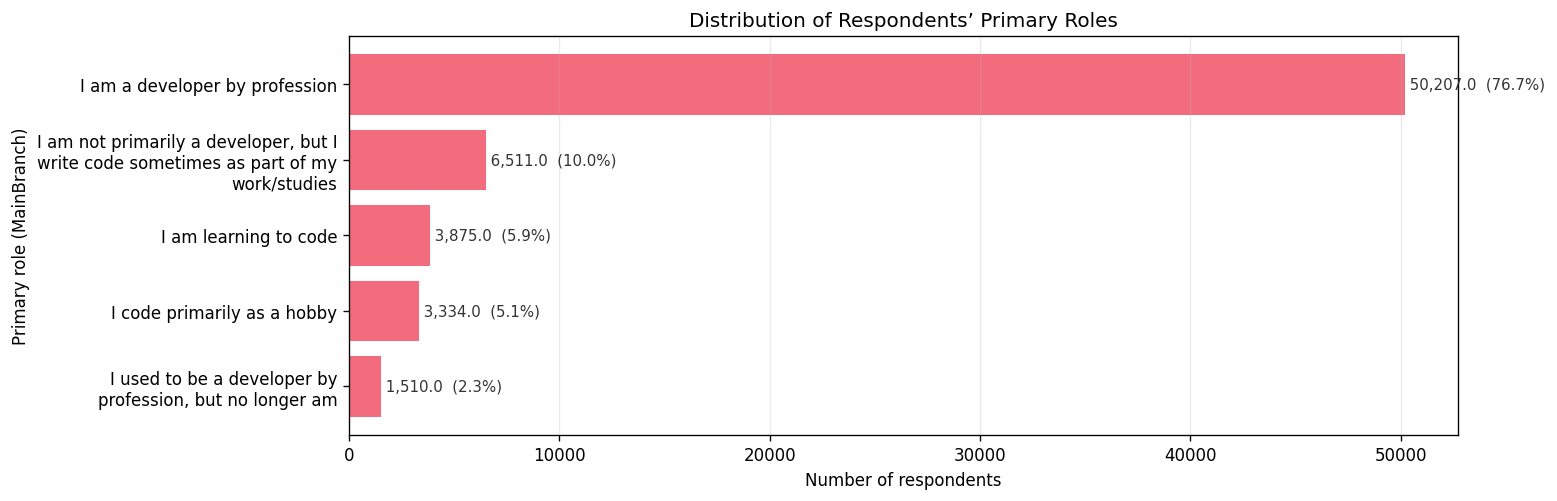

In [8]:
## Write your code here
# %%
# Lab 23 — Task 3.1
# Horizontal bar chart of MainBranch (primary role) distribution
# SQL (sqlite3) to aggregate, Matplotlib to visualize.

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- pick the right column name if your dataset uses a variant ---
def pick(cols):
    for c in cols:
        if c in df.columns:
            return c
    return None

main_col = pick(["MainBranch", "PrimaryRole", "MainBranchSO", "MainRole"])
if main_col is None:
    raise ValueError("Could not find a primary-role column (tried MainBranch / PrimaryRole).")

# --- load DataFrame into SQLite and aggregate with SQL ---
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, index=False, if_exists="replace")

sql = f"""
SELECT TRIM({main_col}) AS role, COUNT(*) AS n
FROM survey
WHERE {main_col} IS NOT NULL AND TRIM({main_col}) <> ''
GROUP BY TRIM({main_col})
ORDER BY n DESC
"""
counts = pd.read_sql_query(sql, conn)
conn.close()

if counts.empty:
    print("⚠️ No rows found for MainBranch/primary role.")
else:
    # If there are many categories, keep top 10 and collapse the rest into "Other"
    MAX_CATS = 10
    if len(counts) > MAX_CATS:
        top = counts.head(MAX_CATS).copy()
        other_n = counts["n"].iloc[MAX_CATS:].sum()
        counts_plot = pd.concat([top, pd.DataFrame([{"role": "Other", "n": other_n}])], ignore_index=True)
    else:
        counts_plot = counts.copy()

    counts_plot["pct"] = counts_plot["n"] / counts_plot["n"].sum() * 100.0

    # Sort so the largest bar is at the top of the chart
    counts_plot = counts_plot.sort_values("n", ascending=True)

    # --- plot ---
# --- plotting only: make bars area larger than the (long) y labels ---
from textwrap import fill
import matplotlib.pyplot as plt
import numpy as np

# wrap long category names (so they don't steal too much left margin)
wrap_width = 38
labels_wrapped = [fill(s, wrap_width) for s in counts_plot["role"]]

# dynamic figure size (wider + a bit taller if many rows)
fig_w = 14
fig_h = max(4, 0.45 * len(counts_plot) + 1.8)
fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=120)

# enlarge axes area: [left, bottom, width, height] in figure coords
# (gives labels room on the left while keeping a wide plotting region)
ax.set_position([0.30, 0.12, 0.66, 0.82])

ax.barh(labels_wrapped, counts_plot["n"], color="#f36c7d")

ax.set_xlabel("Number of respondents")
ax.set_ylabel("Primary role (MainBranch)")
ax.set_title("Distribution of Respondents’ Primary Roles")

# annotate each bar with count and percent
for y, (n, pct) in enumerate(counts_plot[["n", "pct"]].to_numpy()):
    ax.text(n, y, f" {n:,}  ({pct:.1f}%)", va="center", ha="left", fontsize=9, color="#333")

ax.grid(True, axis="x", alpha=0.25)
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



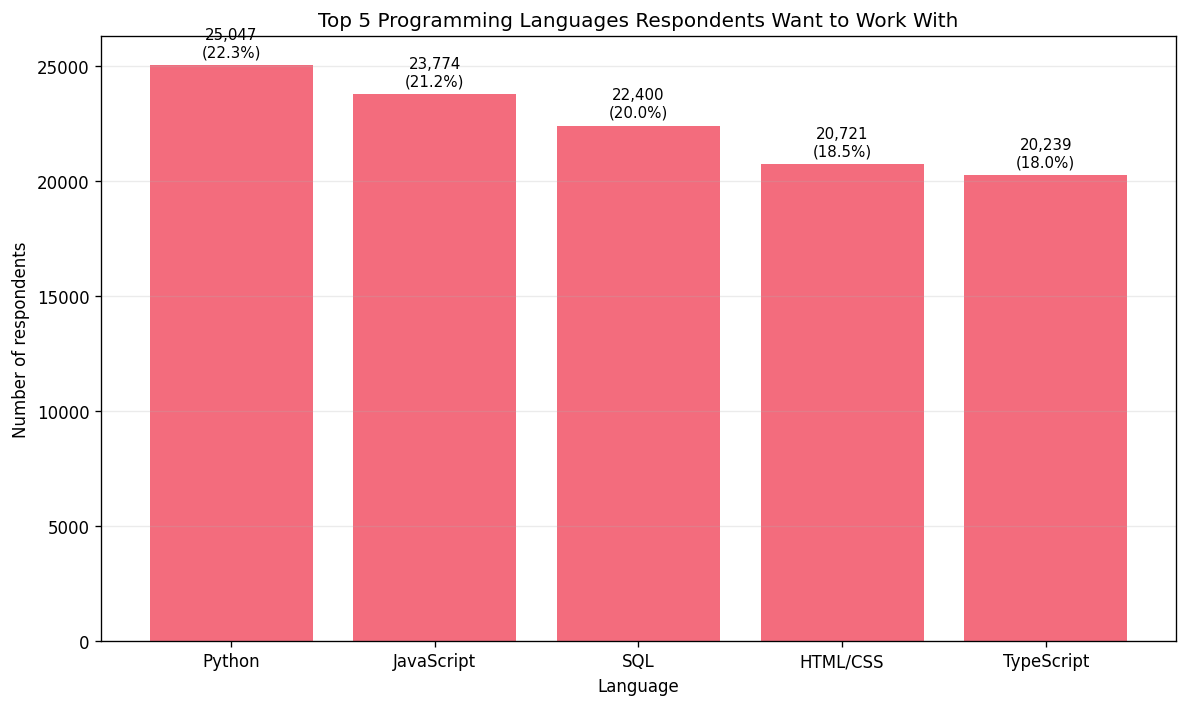

In [ ]:
## Write your code here
# --- Task 3.2 — Vertical Bar: Top 5 languages people WANT to work with ---

import sqlite3, pandas as pd, numpy as np, matplotlib.pyplot as plt

# 1) Put your DataFrame into SQLite (in-memory) if not already there
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, index=False, if_exists="replace")

# Helper to pick the right column name if your file uses a variant
def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

lang_want_col = pick([
    "LanguageWantToWorkWith",           # expected
    "LanguageDesiredNextYear",          # common SO variant
    "LanguageDesireNextYear",
    "LanguageWantToWorkWith_2023"
])
if not lang_want_col:
    raise ValueError("Could not find the ‘LanguageWantToWorkWith’ column in the dataset.")

# 2) SQL: split the multi-select values (semicolon-separated) using a recursive CTE,
#        normalize a few common aliases, then count and take Top 5
sql = f"""
WITH base AS (
  SELECT TRIM({lang_want_col}) AS s
  FROM survey
  WHERE {lang_want_col} IS NOT NULL AND TRIM({lang_want_col}) <> ''
),
prep AS (                 -- add a trailing ';' to make splitting easier
  SELECT s || ';' AS s FROM base
),
split AS (                -- recursively extract tokens between semicolons
  SELECT TRIM(substr(s, 1, instr(s, ';')-1)) AS token,
         substr(s, instr(s, ';')+1)          AS rest
  FROM prep
  UNION ALL
  SELECT TRIM(substr(rest, 1, instr(rest, ';')-1)),
         substr(rest, instr(rest, ';')+1)
  FROM split
  WHERE rest <> ''
),
norm AS (                 -- light normalization of a few aliases
  SELECT
    CASE
      WHEN lower(token) IN ('js','javascript')             THEN 'JavaScript'
      WHEN lower(token) IN ('ts','typescript')             THEN 'TypeScript'
      WHEN lower(replace(token,' ','')) IN ('c#','csharp') THEN 'C#'
      WHEN lower(token) IN ('c++','cpp')                   THEN 'C++'
      WHEN lower(token) LIKE 'node.js%' OR lower(token)='node' THEN 'Node.js'
      ELSE token
    END AS Language
  FROM split
  WHERE token <> ''
)
SELECT Language, COUNT(*) AS n
FROM norm
GROUP BY Language
ORDER BY n DESC
LIMIT 5;
"""

top5 = pd.read_sql_query(sql, conn)
conn.close()

# Compute percentages (of all chosen languages in these top 5 rows)
total = top5["n"].sum()
top5["pct"] = 100 * top5["n"] / total

# 3) Plot: vertical bar chart
fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
bars = ax.bar(top5["Language"], top5["n"], color="#f36c7d")

ax.set_title("Top 5 Programming Languages Respondents Want to Work With")
ax.set_xlabel("Language")
ax.set_ylabel("Number of respondents")
ax.grid(True, axis="y", alpha=0.25)

# annotate each bar with count and share
for b, n, p in zip(bars, top5["n"], top5["pct"]):
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + max(top5["n"])*0.01,
            f"{n:,}\n({p:.1f}%)",
            ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


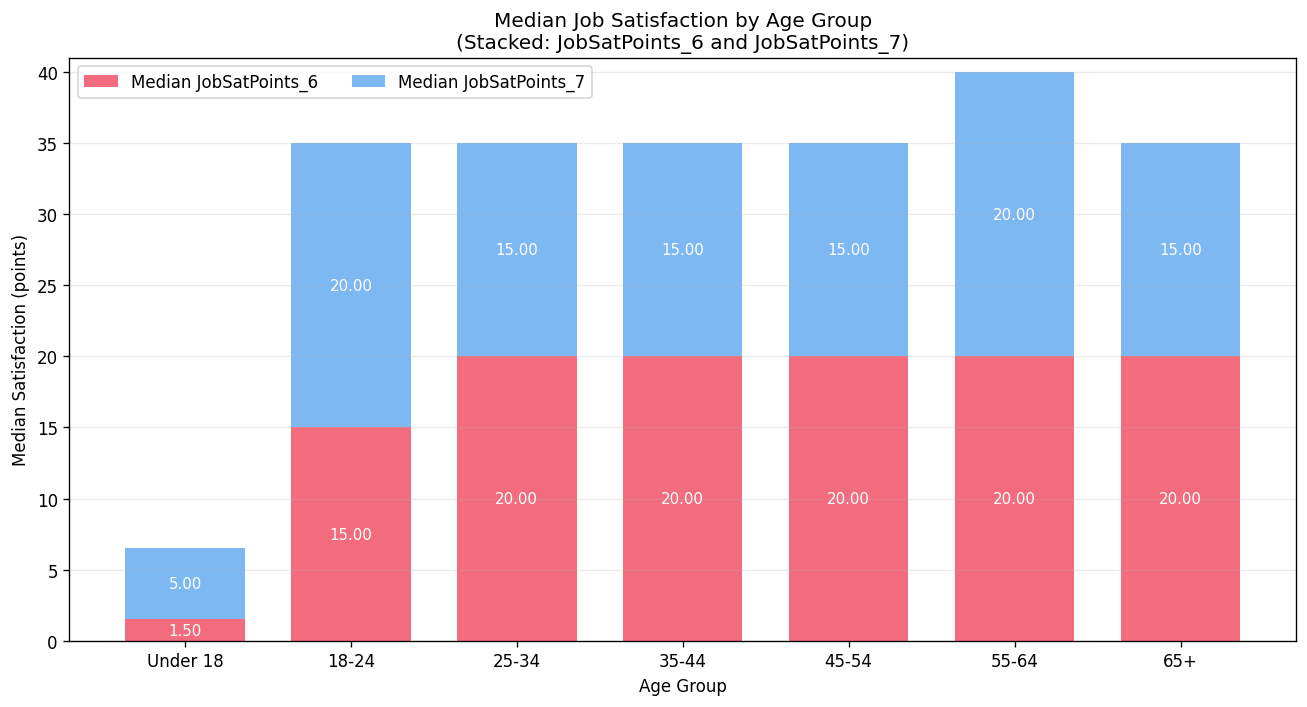

In [10]:
## Write your code here
# --- Task 3.3 — Stacked Bar: Median JobSatPoints_6 & _7 by Age Group ---

import re, sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- helpers ----------
def pick(cols):
    for c in cols:
        if c in df.columns: return c
    return None

def age_group_label(val):
    """Normalize Age to canonical bands (handles '25-34 years old', 'Under 18', '65+')."""
    if pd.isna(val): return np.nan
    s = str(val).strip()
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)
    if m: return f"{int(m.group(1))}-{int(m.group(2))}"
    if re.search(r'under\s*18', s, re.I): return "Under 18"
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): return "65+"
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    if not m2: return np.nan
    a = float(m2.group(1))
    for lo, hi, lab in [(0,17,"Under 18"),(18,24,"18-24"),(25,34,"25-34"),
                        (35,44,"35-44"),(45,54,"45-54"),(55,64,"55-64"),(65,200,"65+")]:
        if lo <= a <= hi: return lab
    return np.nan

sat6_col = pick(["JobSatPoints_6","JobSat_6"])
sat7_col = pick(["JobSatPoints_7","JobSat_7"])
if sat6_col is None:
    raise ValueError("JobSatPoints_6 column not found.")

# Stage minimal table (AgeGroup + two satisfaction series)
stg = pd.DataFrame({
    "AgeGroup": df["Age"].map(age_group_label),
    "Sat6": pd.to_numeric(df[sat6_col], errors="coerce"),
    "Sat7": pd.to_numeric(df[sat7_col], errors="coerce") if sat7_col else np.nan,
}).dropna(subset=["AgeGroup"])

# Keep canonical order
age_order = ["Under 18","18-24","25-34","35-44","45-54","55-64","65+"]

# ---------- medians via SQLite (window functions), with pandas fallback ----------
def sql_medians(stg_df):
    conn = sqlite3.connect(":memory:")
    stg_df.to_sql("stg", conn, index=False, if_exists="replace")

    order_case = "CASE " + " ".join([f"WHEN AgeGroup='{g}' THEN {i}" for i,g in enumerate(age_order)]) + " ELSE 999 END"

    sql = f"""
    WITH ranked6 AS (
      SELECT AgeGroup, Sat6 AS val,
             ROW_NUMBER() OVER (PARTITION BY AgeGroup ORDER BY Sat6) AS rn,
             COUNT(*)    OVER (PARTITION BY AgeGroup)                AS cnt
      FROM stg
      WHERE Sat6 IS NOT NULL
    ),
    med6 AS (
      SELECT AgeGroup, AVG(val) AS med6
      FROM ranked6
      WHERE rn IN (CAST((cnt+1)/2 AS INT), CAST((cnt+2)/2 AS INT))
      GROUP BY AgeGroup
    )
    {" , ranked7 AS ( "
     " SELECT AgeGroup, Sat7 AS val,"
     " ROW_NUMBER() OVER (PARTITION BY AgeGroup ORDER BY Sat7) AS rn,"
     " COUNT(*)    OVER (PARTITION BY AgeGroup)                AS cnt"
     " FROM stg WHERE Sat7 IS NOT NULL ),"
     " med7 AS ("
     " SELECT AgeGroup, AVG(val) AS med7"
     " FROM ranked7"
     " WHERE rn IN (CAST((cnt+1)/2 AS INT), CAST((cnt+2)/2 AS INT))"
     " GROUP BY AgeGroup )" if sat7_col else ""
    }
    SELECT m6.AgeGroup, m6.med6, {("m7.med7" if sat7_col else "NULL AS med7")}
    FROM med6 m6
    {("LEFT JOIN med7 m7 USING (AgeGroup)" if sat7_col else "")}
    ORDER BY {order_case};
    """
    out = pd.read_sql_query(sql, conn)
    conn.close()
    return out

try:
    meds = sql_medians(stg)
except Exception:
    # fallback if SQLite lacks window functions
    grp = stg.groupby("AgeGroup")
    meds = pd.DataFrame({
        "AgeGroup": [g for g,_ in grp],
        "med6": grp["Sat6"].median().values,
        "med7": (grp["Sat7"].median().values if sat7_col else np.zeros(len(grp)))
    })

# Order rows, fill missing with 0 for stacking
meds["__ord"] = meds["AgeGroup"].map({g:i for i,g in enumerate(age_order)})
meds = meds.sort_values("__ord").drop(columns="__ord").fillna(0)

# ---------- plot: stacked bars ----------
x = np.arange(len(meds))
w = 0.72

fig, ax = plt.subplots(figsize=(11, 6), dpi=120)
b1 = ax.bar(x, meds["med6"], width=w, label="Median JobSatPoints_6", color="#f36c7d")
b2 = ax.bar(x, meds["med7"], width=w, bottom=meds["med6"], label="Median JobSatPoints_7", color="#7db8f3")

ax.set_xticks(x)
ax.set_xticklabels(meds["AgeGroup"])
ax.set_xlabel("Age Group")
ax.set_ylabel("Median Satisfaction (points)")
ax.set_title("Median Job Satisfaction by Age Group\n(Stacked: JobSatPoints_6 and JobSatPoints_7)")
ax.grid(True, axis="y", alpha=0.25)
ax.legend(frameon=True, ncol=2)

# nice y-limit (each series is on a 1–6 scale)
ax.set_ylim(0, max(12, (meds["med6"] + meds["med7"]).max() + 1))

# annotate values
for i, (m6, m7) in enumerate(zip(meds["med6"], meds["med7"])):
    if m6 > 0:
        ax.text(i, m6/2, f"{m6:.2f}", ha="center", va="center", color="white", fontsize=9)
    if m7 > 0:
        ax.text(i, m6 + m7/2, f"{m7:.2f}", ha="center", va="center", color="white", fontsize=9)

plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



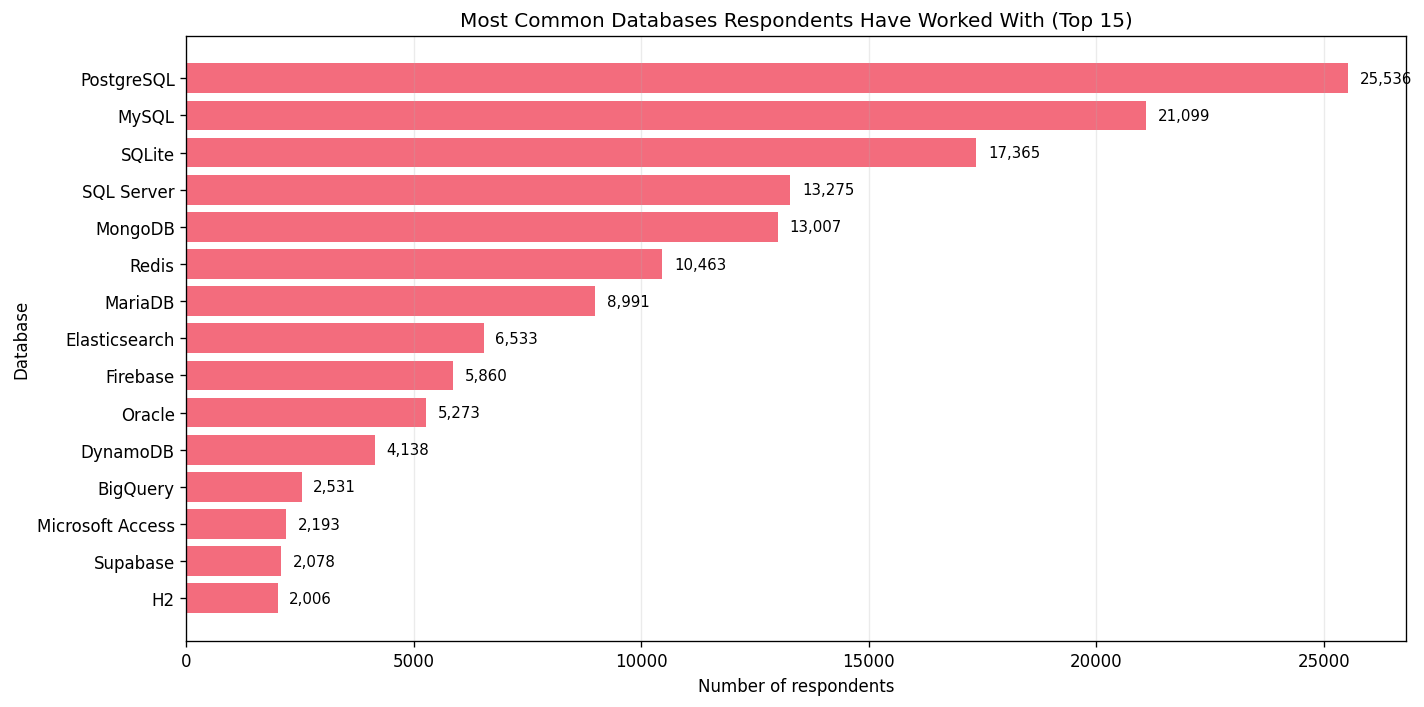

In [11]:
## Write your code here
# --- Task 3.4 — Bar chart of Database popularity (DatabaseHaveWorkedWith) ---

import sqlite3, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# find the right column name if it varies
def find_col(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

db_col = find_col([
    "DatabaseHaveWorkedWith", "DatabasesWorkedWith", "DatabaseWorkedWith",
    "DatabaseHaveWorkedWith_2023"
])
if not db_col:
    raise ValueError("Couldn't find the 'DatabaseHaveWorkedWith' column.")

# push the whole DataFrame to SQLite (in-memory)
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, index=False, if_exists="replace")

# NOTE: SQLite doesn’t have REGEXP by default, so we normalize with LOWER()+LIKE.
sql = f"""
WITH base AS (
  SELECT rowid AS id, TRIM({db_col}) AS dbs
  FROM survey
  WHERE {db_col} IS NOT NULL AND TRIM({db_col}) <> ''
),
-- Split semicolon-separated values: token = current item, rest = remainder
split(id, token, rest) AS (
  SELECT id,
         TRIM(CASE WHEN instr(dbs,';')=0 THEN dbs ELSE substr(dbs,1,instr(dbs,';')-1) END),
         TRIM(CASE WHEN instr(dbs,';')=0 THEN ''   ELSE substr(dbs,instr(dbs,';')+1) END)
  FROM base
  UNION ALL
  SELECT id,
         TRIM(CASE WHEN instr(rest,';')=0 THEN rest ELSE substr(rest,1,instr(rest,';')-1) END),
         TRIM(CASE WHEN instr(rest,';')=0 THEN ''   ELSE substr(rest,instr(rest,';')+1) END)
  FROM split
  WHERE rest <> ''
),
clean AS (
  SELECT token AS raw_db
  FROM split
  WHERE token IS NOT NULL AND token <> ''
),
norm AS (
  SELECT
    CASE
      WHEN lower(raw_db) LIKE '%postgres%'           THEN 'PostgreSQL'
      WHEN lower(raw_db) LIKE '%microsoft%sql%'      THEN 'SQL Server'
      WHEN lower(raw_db) LIKE 'ms sql%'              THEN 'SQL Server'
      WHEN lower(raw_db) LIKE '%mysql%'              THEN 'MySQL'
      WHEN lower(raw_db) LIKE '%sqlite%'             THEN 'SQLite'
      WHEN lower(raw_db) LIKE '%oracle%'             THEN 'Oracle'
      WHEN lower(raw_db) LIKE '%mariadb%'            THEN 'MariaDB'
      WHEN lower(raw_db) LIKE '%mongo%'              THEN 'MongoDB'
      WHEN lower(raw_db) LIKE '%redis%'              THEN 'Redis'
      WHEN lower(raw_db) LIKE '%dynamo%'             THEN 'DynamoDB'
      WHEN lower(raw_db) LIKE '%firestore%' OR lower(raw_db) LIKE '%firebase%' THEN 'Firebase'
      WHEN lower(raw_db) LIKE '%snowflake%'          THEN 'Snowflake'
      WHEN lower(raw_db) LIKE '%cassandra%'          THEN 'Cassandra'
      ELSE raw_db
    END AS Database
  FROM clean
)
SELECT Database, COUNT(*) AS n
FROM norm
GROUP BY Database
ORDER BY n DESC
LIMIT 15;
"""

try:
    res = pd.read_sql_query(sql, conn)
finally:
    conn.close()

if res.empty:
    print("⚠️ No database responses found after cleaning.")
else:
    # ---- plot: horizontal bar chart (largest at top) ----
    res = res.sort_values("n", ascending=True)  # for barh ordering
    fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

    ax.barh(res["Database"], res["n"], color="#f36c7d", edgecolor="none")
    for n, y in zip(res["n"], range(len(res))):
        ax.text(n + max(res["n"])*0.01, y, f"{int(n):,}", va="center", fontsize=9)

    ax.set_xlabel("Number of respondents")
    ax.set_ylabel("Database")
    ax.set_title("Most Common Databases Respondents Have Worked With (Top 15)")
    ax.grid(True, axis="x", alpha=0.25)
    plt.tight_layout()
    plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



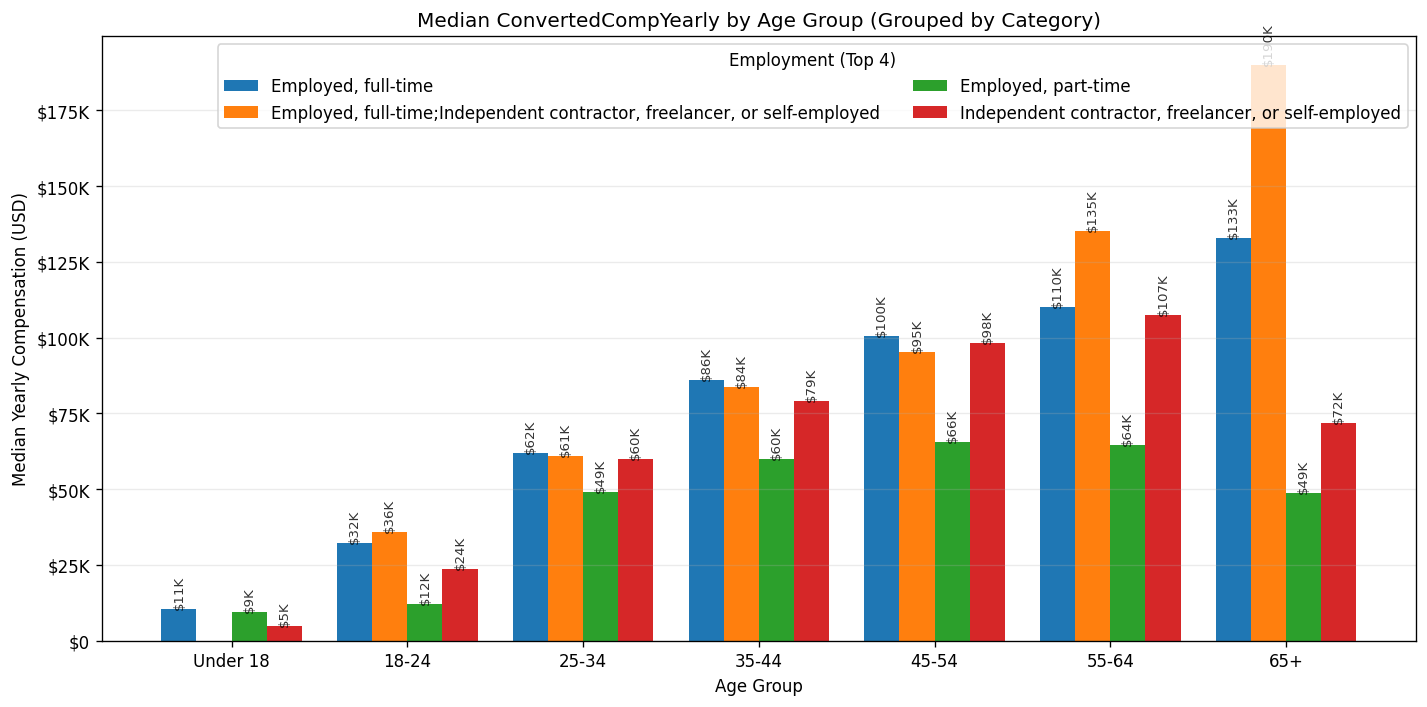

In [12]:
## Write your code here
# --- Task 4.1 — Grouped bar chart of median ConvertedCompYearly by Age Group (sqlite3) ---

import sqlite3, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ---------- helpers ----------
def human_currency(v, _):
    if v >= 1e9: return f"${v/1e9:.1f}B"
    if v >= 1e6: return f"${v/1e6:.1f}M"
    if v >= 1e3: return f"${v/1e3:.0f}K"
    return f"${v:.0f}"

def find_col(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

def age_group_label(val):
    if pd.isna(val): return np.nan
    s = str(val).strip()
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)          # "25-34 years old"
    if m: return f"{int(m.group(1))}-{int(m.group(2))}"
    if re.search(r'under\s*18', s, re.I): return "Under 18"
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): return "65+"
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    if not m2: return np.nan
    a = float(m2.group(1))
    for lo, hi, lab in [(0,17,"Under 18"),(18,24,"18-24"),(25,34,"25-34"),
                        (35,44,"35-44"),(45,54,"45-54"),(55,64,"55-64"),(65,120,"65+")]:
        if lo <= a <= hi: return lab
    return np.nan

# ---------- pick columns ----------
comp_col = find_col(["ConvertedCompYearly","CompTotal","CompTotalUSD","Salary"])
cat_col  = find_col(["Employment","Country","MainBranch"])   # grouping dimension (priority order)
if comp_col is None or cat_col is None:
    raise ValueError("Need 'ConvertedCompYearly' and at least one of: Employment, Country, MainBranch.")

# ---------- stage data (create AgeGroup in Python for reliable parsing) ----------
stg = pd.DataFrame({
    "AgeGroup": df["Age"].map(age_group_label),
    "Comp": pd.to_numeric(df[comp_col], errors="coerce"),
    "Cat": df[cat_col].astype(str).str.strip()
})
stg = stg[(stg["AgeGroup"].notna()) & (stg["Comp"] > 0) & (stg["Cat"].ne(""))]

if stg.empty:
    print("⚠️ No valid rows after cleaning (check Age / compensation).")
else:
    # ---------- SQL median per AgeGroup × Category (top 4 categories only) ----------
    conn = sqlite3.connect(":memory:")
    stg.to_sql("stg", conn, index=False, if_exists="replace")

    age_order = ["Under 18","18-24","25-34","35-44","45-54","55-64","65+"]
    order_case = "CASE " + " ".join([f"WHEN AgeGroup='{g}' THEN {i}" for i,g in enumerate(age_order)]) + " ELSE 999 END"

    sql = f"""
    WITH counts AS (
      SELECT Cat, COUNT(*) AS n
      FROM stg
      GROUP BY Cat
    ),
    topcat AS (
      SELECT Cat FROM counts ORDER BY n DESC LIMIT 4
    ),
    base AS (
      SELECT AgeGroup, Cat, Comp
      FROM stg
      WHERE Cat IN (SELECT Cat FROM topcat)
    ),
    ranked AS (
      SELECT
        AgeGroup, Cat, Comp AS val,
        ROW_NUMBER() OVER (PARTITION BY AgeGroup, Cat ORDER BY Comp) AS rn,
        COUNT(*)    OVER (PARTITION BY AgeGroup, Cat)                 AS cnt
      FROM base
    ),
    med AS (
      SELECT AgeGroup, Cat, AVG(val) AS med_comp
      FROM ranked
      WHERE rn IN (CAST((cnt + 1)/2 AS INT), CAST((cnt + 2)/2 AS INT))
      GROUP BY AgeGroup, Cat
    )
    SELECT AgeGroup, Cat, med_comp
    FROM med
    ORDER BY {order_case}, Cat;
    """

    meds = pd.read_sql_query(sql, conn)
    conn.close()

    if meds.empty:
        print("⚠️ Nothing to plot after aggregation.")
    else:
        # Pivot to wide for grouped bars
        wide = (meds.pivot_table(index="AgeGroup", columns="Cat", values="med_comp", aggfunc="mean")
                      .reindex(age_order))
        wide = wide.dropna(how="all")

        # ---- plot grouped bars ----
        fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
        n_groups = len(wide)
        n_series = len(wide.columns)
        x = np.arange(n_groups)
        width = min(0.8 / max(n_series,1), 0.22)  # bar width per series

        for i, col in enumerate(wide.columns):
            ax.bar(x + (i - (n_series-1)/2)*width, wide[col].values,
                   width=width, label=col)

            # annotate each bar with the median value (K/M formatting via human_currency)
            for xi, val in zip(x, wide[col].values):
                if pd.notna(val):
                    ax.text(xi + (i - (n_series-1)/2)*width, val,
                            human_currency(val, None),
                            ha='center', va='bottom', fontsize=8, rotation=90, alpha=0.8)

        ax.set_xticks(x)
        ax.set_xticklabels(wide.index)
        ax.set_ylabel("Median Yearly Compensation (USD)")
        ax.set_xlabel("Age Group")
        ax.set_title("Median ConvertedCompYearly by Age Group (Grouped by Category)")
        ax.yaxis.set_major_formatter(FuncFormatter(human_currency))
        ax.grid(True, axis='y', alpha=0.25)
        ax.legend(title=f"{cat_col} (Top 4)", frameon=True, ncol=min(2, n_series))

        plt.tight_layout()
        plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



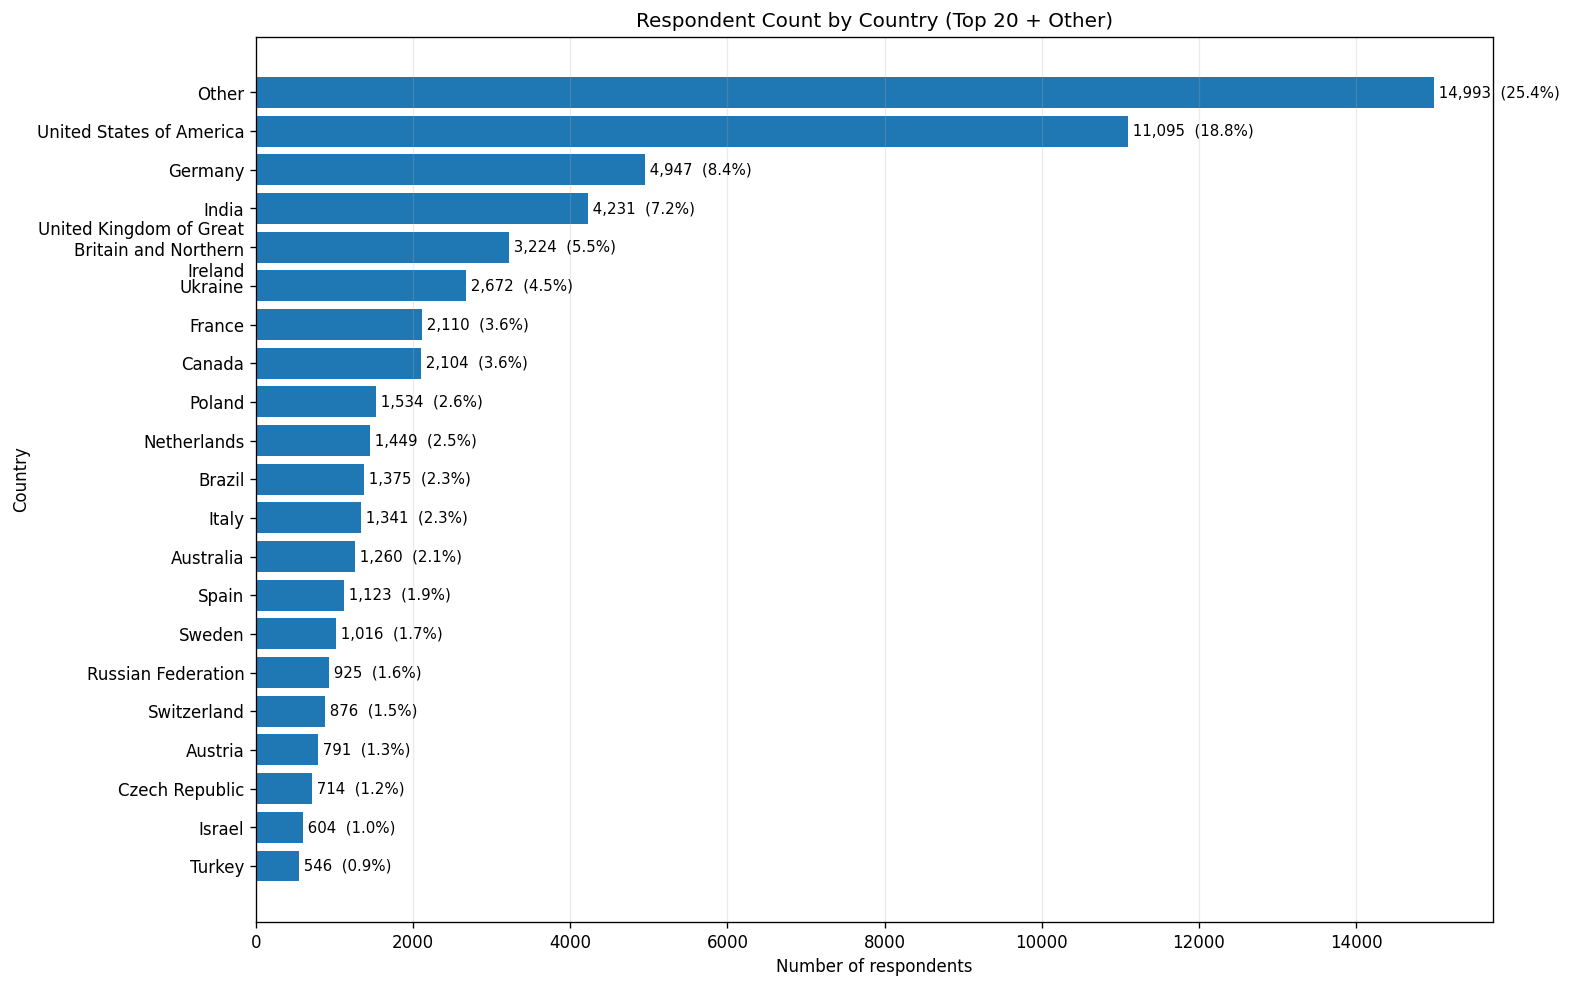

In [13]:
## Write your code here
# --- Task 4.2 — Bar chart of Respondent Count by Country (sqlite3 + matplotlib) ---

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import fill

# 1) Pick the correct column name (handles minor naming variants)
def pick(cols):
    for c in cols:
        if c in df.columns:
            return c
    return None

country_col = pick(["Country", "CountryName", "RespondentCountry"])
if country_col is None:
    raise ValueError("Could not find a country column (tried Country / CountryName / RespondentCountry).")

# 2) Push DataFrame to SQLite and aggregate counts
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, index=False, if_exists="replace")

sql = f"""
SELECT TRIM({country_col}) AS country, COUNT(*) AS n
FROM survey
WHERE {country_col} IS NOT NULL AND TRIM({country_col}) <> ''
GROUP BY TRIM({country_col})
ORDER BY n DESC
"""
counts = pd.read_sql_query(sql, conn)
conn.close()

if counts.empty:
    print("⚠️ No country data found to plot.")
else:
    # Keep Top N countries for readability (collapse the rest into 'Other')
    TOP_N = 20
    if len(counts) > TOP_N:
        top = counts.head(TOP_N).copy()
        other_n = counts["n"].iloc[TOP_N:].sum()
        counts_plot = pd.concat(
            [top, pd.DataFrame([{"country": "Other", "n": other_n}])],
            ignore_index=True
        )
    else:
        counts_plot = counts.copy()

    # Add percentage of total
    total = counts_plot["n"].sum()
    counts_plot["pct"] = counts_plot["n"] / total * 100.0

    # Sort ascending so largest appears at top in a horizontal chart
    counts_plot = counts_plot.sort_values("n", ascending=True)

    # Wrap long country names so labels don't eat the canvas
    wrap_width = 24
    labels_wrapped = [fill(s, wrap_width) for s in counts_plot["country"]]

    # 3) Plot — horizontal bar chart
    fig_w = 12
    fig_h = max(5, 0.36 * len(counts_plot) + 1.5)  # dynamic height
    fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=120)

    # Give label column some room on the left, keep wide plotting area
    ax.set_position([0.30, 0.10, 0.66, 0.85])  # [left, bottom, width, height]

    ax.barh(labels_wrapped, counts_plot["n"])

    ax.set_xlabel("Number of respondents")
    ax.set_ylabel("Country")
    ax.set_title("Respondent Count by Country (Top 20 + Other)")

    # Annotate each bar with count and percent
    for y, (n, p) in enumerate(counts_plot[["n", "pct"]].to_numpy()):
        ax.text(n, y, f" {int(n):,}  ({p:.1f}%)", va="center", ha="left", fontsize=9)

    ax.grid(True, axis="x", alpha=0.25)
    plt.tight_layout()
    plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


Final Review — Bar Charts & Related Visualizations
--What you built
-Distributions
Histogram of ConvertedCompYearly to inspect overall pay distribution (right-skew and outliers).
Box plot of Age (numeric) after converting categorical ranges to numbers.
-Relationships
Scatter: Age_numeric vs ConvertedCompYearly.
Bubble: ConvertedCompYearly vs JobSatPoints_6 (bubble size = Age_numeric).
-Composition & Comparison (Bar Charts)
Horizontal bars for MainBranch distribution (primary roles).
Vertical bars for Top 5 desired languages from LanguageWantToWorkWith.
Stacked bars of median JobSatPoints_6 + JobSatPoints_7 by Age Group.
Bars of database popularity from DatabaseHaveWorkedWith.
Grouped bars of median ConvertedCompYearly across Age Groups (by top category like Employment/Country).
Horizontal bars of respondent counts by Country.

--Key takeaways (interpretation guide)
-Compensation distribution (histogram): Expect a heavy right tail; consider log scales and IQR to discuss outliers.
Observation: (insert observation, e.g., “Long tail above $200K; median around …”)
-Age box plot: Highlights spread and any unusual coding of ages.
Observation: (e.g., “Most respondents cluster in 25–34.”)
-Age ↔ Compensation (scatter/bubble): Look for gradual increase, high variance at senior ages, and ceiling effects.
Observation: (e.g., “Weak–moderate positive association; variability increases with age.”)
-Desired languages (bars): Quickly shows the current “wish-list” tech.
Observation: (e.g., “JavaScript/TypeScript lead; Python strong across groups.”)
-Databases (bars): Reveals common operational stacks.
Observation: (e.g., “PostgreSQL, MySQL, and SQLite dominate; MongoDB notable.”)
-Job satisfaction (stacked medians): Comparing JobSatPoints_6 and _7 together shows consistency across age bands.
Observation: (e.g., “Medians are relatively stable from 25–54; slight dip/rise in …”)
-Grouped comp by age (grouped bars): Makes cross-category differences visible (e.g., Employment types).
Observation: (e.g., “Full-time medians consistently higher than freelancing in each age band.”)
-Respondents by country (bars): Context for representativeness; avoid over-generalizing from small countries.
Observation: (e.g., “Top 5 countries account for ~X% of responses.”)

--Data handling & methodology
-Multi-select fields (languages, databases) were split in SQLite via recursive CTEs, then lightly normalized (aliases → canonical names) before counting.
-Age was normalized into canonical bands (Under 18, 18–24, …, 65+) for consistent grouping.
-Medians computed with SQLite window functions (with pandas fallback) to reduce sensitivity to outliers.
-Readability: wrapped long labels, adjusted figure/layout sizes, used legends and direct value labels where helpful.

--Limitations
-Self-reported survey → not a random sample; results reflect respondent mix.
-Skewed pay → medians are better than means; still consider geographical cost-of-living differences.
-Textual fields → normalization may miss rare aliases or languages/DBs with unusual spelling.

--Suggested next steps
-Add confidence intervals (bootstrap medians) for grouped comparisons.
-Use log scales on compensation plots for clearer mid-range structure.
-Break down charts by region or role (e.g., Data vs Web) for more targeted insights.
-Explore trendlines or LOESS for non-linear patterns in scatter/bubble plots.

--One-paragraph summary
This lab demonstrated how bar charts (plain, grouped, and stacked), plus supporting histograms, scatter, and bubble plots, can reveal composition, comparison, and distribution patterns in the Stack Overflow developer dataset. After normalizing multi-select text fields and age groups, we compared counts (e.g., desired languages, database usage, country representation) and medians (e.g., compensation, satisfaction) across relevant categories like age and employment type. Overall, compensation is right-skewed, commonly used/desired technologies cluster around a few leaders, and median satisfaction remains fairly stable across age groups with nuanced differences by category. These visuals provide a clear, data-driven foundation for communicating trends and guiding further analysis.

## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
